In [25]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
import zipfile
with zipfile.ZipFile('/content/gdrive/MyDrive/Colab Notebooks/CNN_assignment.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/Colab Notebooks/')

In [28]:
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/Test')

In [29]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/Colab Notebooks/Train')

PosixPath('/content/gdrive/MyDrive/Colab Notebooks/Train')

In [30]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

725
12
725
12


In [31]:
batch_size = 32
img_height = 180
img_width = 180

In [32]:
# Create train dataset
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds = image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=None,
    subset=None
)

Found 12625 files belonging to 9 classes.
Found 14125 files belonging to 9 classes.


In [33]:
# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    validation_split=0.2,  # Splitting 80% for training and 20% for validation
    subset='validation',   # Use validation subset
    seed=123               # Set seed for reproducibility
)

Found 12625 files belonging to 9 classes.
Using 2525 files for validation.
Found 14125 files belonging to 9 classes.
Using 2825 files for validation.


In [34]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [35]:
import os
import pandas as pd
import pathlib

def class_distribution_count(directory):
    # Initialize a list to store counts of images in each class
    count = []

    # Iterate over subdirectories in the given directory
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            # Count the number of image files in the subdirectory
            image_count = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
            count.append(image_count)

    # Get the names of the subdirectories (class names)
    sub_directories = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

    # Create a DataFrame with class names and corresponding image counts
    return pd.DataFrame(list(zip(sub_directories, count)), columns=['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
print(df)


,Class,No. of Image
0,melanoma,438
1,seborrheic keratosis,0
2,actinic keratosis,0
3,squamous cell carcinoma,0
4,dermatofibroma,0
5,vascular lesion,0
6,nevus,18
7,pigmented benign keratosis,269
8,basal cell carcinoma,0


,Class,No. of Image
0,melanoma,438
1,seborrheic keratosis,0
2,actinic keratosis,0
3,squamous cell carcinoma,0
4,dermatofibroma,0
5,vascular lesion,0
6,nevus,18
7,pigmented benign keratosis,269
8,basal cell carcinoma,0


<Axes: xlabel='No. of Image', ylabel='Class'>

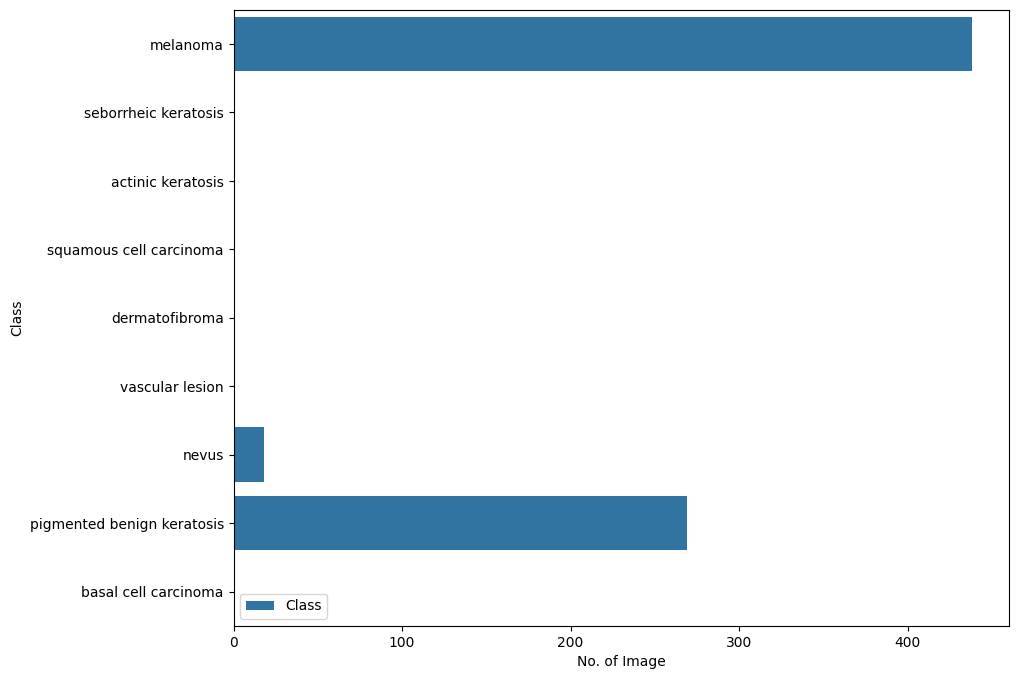

<Axes: xlabel='No. of Image', ylabel='Class'>

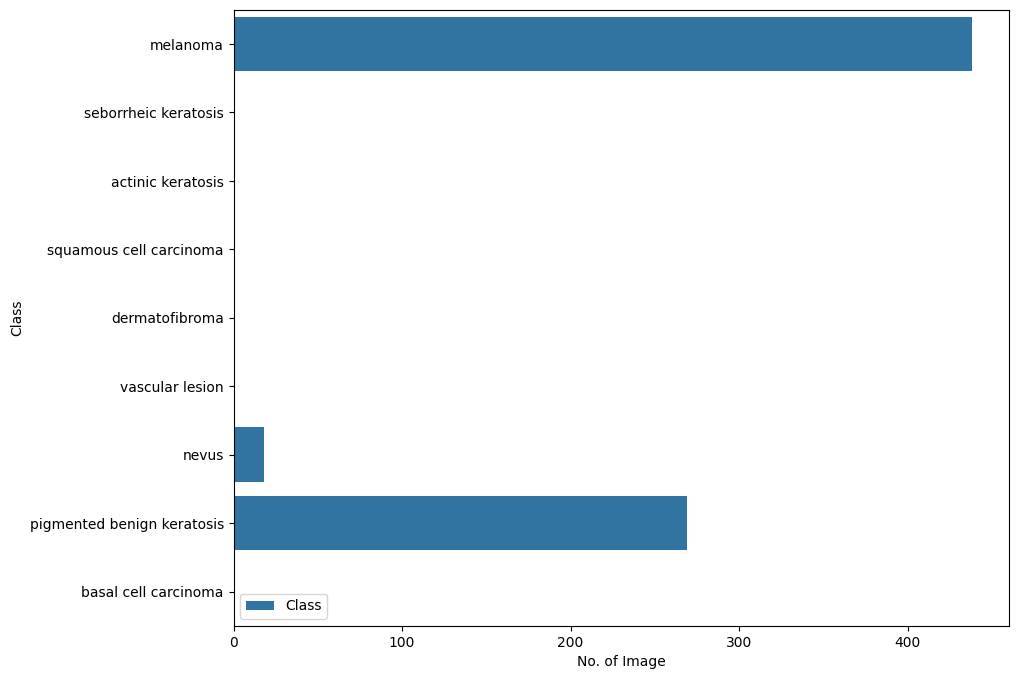

In [36]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

In [37]:
#install Augmentor
!pip install Augmentor

In [38]:
import os
import Augmentor

# Define the path to the training dataset
path_to_training_dataset = "/content/gdrive/MyDrive/Colab Notebooks/Train/"

# Iterate over class names
for class_name in class_names:
    class_dir = os.path.join(path_to_training_dataset, class_name)

    # Check if the directory contains any images
    image_files = [fname for fname in os.listdir(class_dir) if fname.lower().endswith('.jpg')]
    if image_files:
        # Create an Augmentor pipeline
        p = Augmentor.Pipeline(class_dir)

        # Add augmentation operations
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

        # Sample 500 images per class
        p.sample(500)
    else:
        print(f"No images found in {class_dir}. Skipping augmentation for {class_name}.")


No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/actinic keratosis. Skipping augmentation for actinic keratosis.
No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/basal cell carcinoma. Skipping augmentation for basal cell carcinoma.
No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma. Skipping augmentation for dermatofibroma.
Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3872x2592 at 0x7F9CF4EC1300>: 100%|██████████| 500/500 [01:53<00:00,  4.42 Samples/s]


Initialised with 18 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F9CF4EDD600>: 100%|██████████| 500/500 [03:17<00:00,  2.54 Samples/s]


Initialised with 269 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9CF5165420>: 100%|██████████| 500/500 [00:21<00:00, 22.82 Samples/s]

No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/seborrheic keratosis. Skipping augmentation for seborrheic keratosis.
No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/squamous cell carcinoma. Skipping augmentation for squamous cell carcinoma.
No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/vascular lesion. Skipping augmentation for vascular lesion.


No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/actinic keratosis. Skipping augmentation for actinic keratosis.
No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/basal cell carcinoma. Skipping augmentation for basal cell carcinoma.
No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/dermatofibroma. Skipping augmentation for dermatofibroma.
Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9CF5056380>: 100%|██████████| 500/500 [02:14<00:00,  3.73 Samples/s]


Initialised with 18 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3872x2592 at 0x7F9D09F19450>: 100%|██████████| 500/500 [03:28<00:00,  2.40 Samples/s]


Initialised with 269 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9D026C6590>: 100%|██████████| 500/500 [00:23<00:00, 21.09 Samples/s]

No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/seborrheic keratosis. Skipping augmentation for seborrheic keratosis.
No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/squamous cell carcinoma. Skipping augmentation for squamous cell carcinoma.
No images found in /content/gdrive/MyDrive/Colab Notebooks/Train/vascular lesion. Skipping augmentation for vascular lesion.


In [39]:
from pathlib import Path

# Convert the string path to a Path object
data_dir_train_path = Path(data_dir_train)

# Use the glob method to count the number of JPEG files in the specified directory
image_count_train = len(list(data_dir_train_path.glob('*/output/*.jpg')))

# Print the total count of images
print("Total number of images in the training dataset:", image_count_train)


Total number of images in the training dataset: 13400
Total number of images in the training dataset: 14900


In [40]:
# train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes),
#representing a one-hot encoding of the class index.

Found 14125 files belonging to 9 classes.
Using 11300 files for training.
Found 15625 files belonging to 9 classes.
Using 12500 files for training.


In [41]:

# validation dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 14125 files belonging to 9 classes.
Using 2825 files for validation.
Found 15625 files belonging to 9 classes.
Using 3125 files for validation.


In [42]:
#tf.data.experimental.AUTOTUNE defines appropriate number of processes that are free for working.

#`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

#`Dataset.prefetch()` overlaps data preprocessing and model execution while training.


AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [43]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

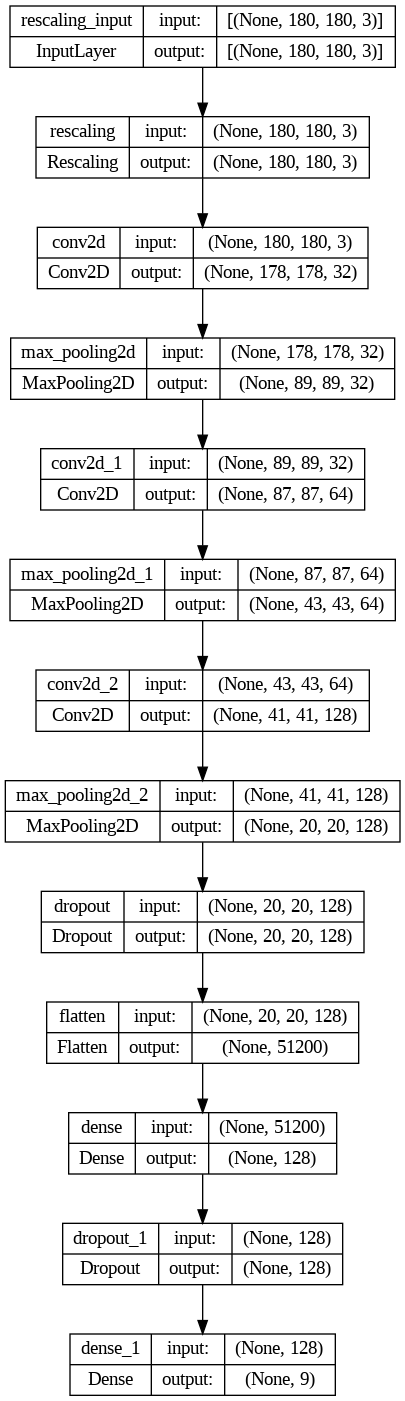

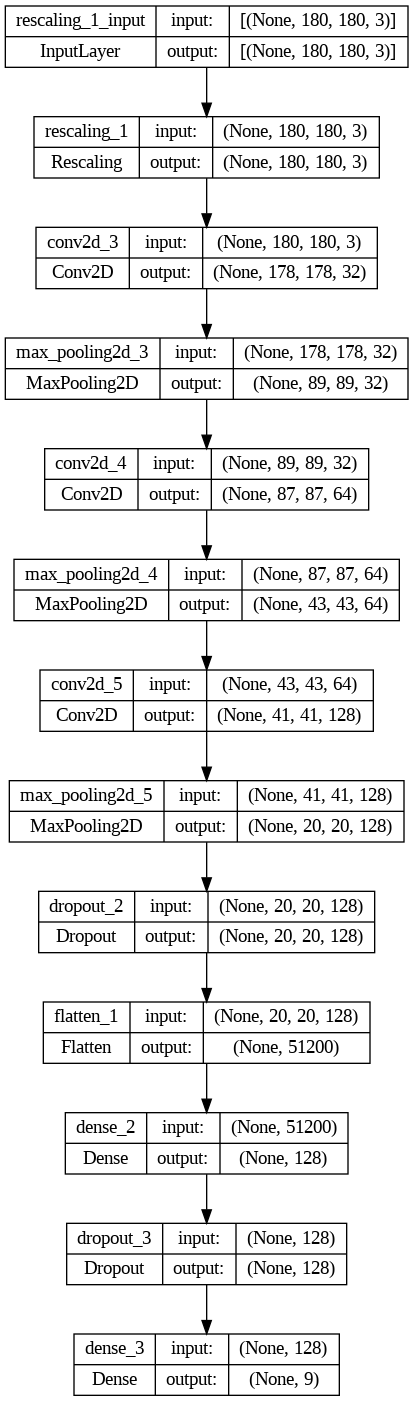

In [44]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [45]:
#Compile the Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [46]:
# Train the model
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/30
354/354 [==============================] - ETA: 0s - loss: 0.5085 - accuracy: 0.7942
Epoch 1: val_accuracy improved from -inf to 0.90053, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


354/354 [==============================] - 4187s 4s/step - loss: 0.5085 - accuracy: 0.7942 - val_loss: 0.2607 - val_accuracy: 0.9005
Epoch 2/30
354/354 [==============================] - ETA: 0s - loss: 0.1878 - accuracy: 0.9328
Epoch 2: val_accuracy improved from 0.90053 to 0.96920, saving model to model.h5
354/354 [==============================] - 803s 2s/step - loss: 0.1878 - accuracy: 0.9328 - val_loss: 0.0933 - val_accuracy: 0.9692
Epoch 3/30
354/354 [==============================] - ETA: 0s - loss: 0.1248 - accuracy: 0.9580
Epoch 3: val_accuracy did not improve from 0.96920
354/354 [==============================] - 768s 2s/step - loss: 0.1248 - accuracy: 0.9580 - val_loss: 0.0961 - val_accuracy: 0.9681
Epoch 4/30
354/354 [==============================] - ETA: 0s - loss: 0.0885 - accuracy: 0.9717
Epoch 4: val_accuracy improved from 0.96920 to 0.97735, saving model to model.h5
354/354 [==============================] - 765s 2s/step - loss: 0.0885 - accuracy: 0.9717 - val_loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


391/391 [==============================] - 1065s 2s/step - loss: 0.5083 - accuracy: 0.7818 - val_loss: 0.1925 - val_accuracy: 0.9216
Epoch 2/30
391/391 [==============================] - ETA: 0s - loss: 0.1705 - accuracy: 0.9409
Epoch 2: val_accuracy improved from 0.92160 to 0.97664, saving model to model.h5
391/391 [==============================] - 864s 2s/step - loss: 0.1705 - accuracy: 0.9409 - val_loss: 0.0834 - val_accuracy: 0.9766
Epoch 3/30
391/391 [==============================] - ETA: 0s - loss: 0.1125 - accuracy: 0.9594
Epoch 3: val_accuracy improved from 0.97664 to 0.97760, saving model to model.h5
391/391 [==============================] - 858s 2s/step - loss: 0.1125 - accuracy: 0.9594 - val_loss: 0.0692 - val_accuracy: 0.9776
Epoch 4/30
391/391 [==============================] - ETA: 0s - loss: 0.0852 - accuracy: 0.9701
Epoch 4: val_accuracy improved from 0.97760 to 0.98816, saving model to model.h5
391/391 [==============================] - 844s 2s/step - loss: 0.0852 -

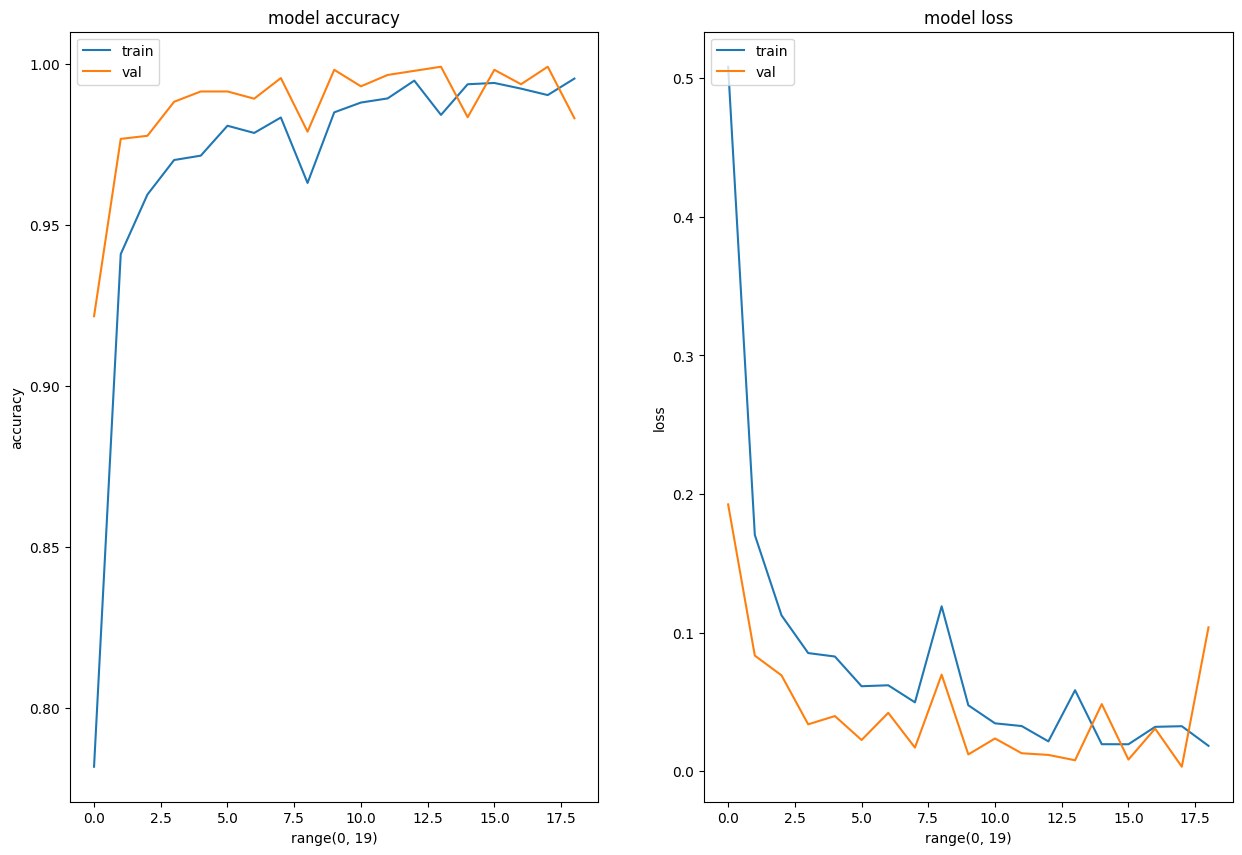

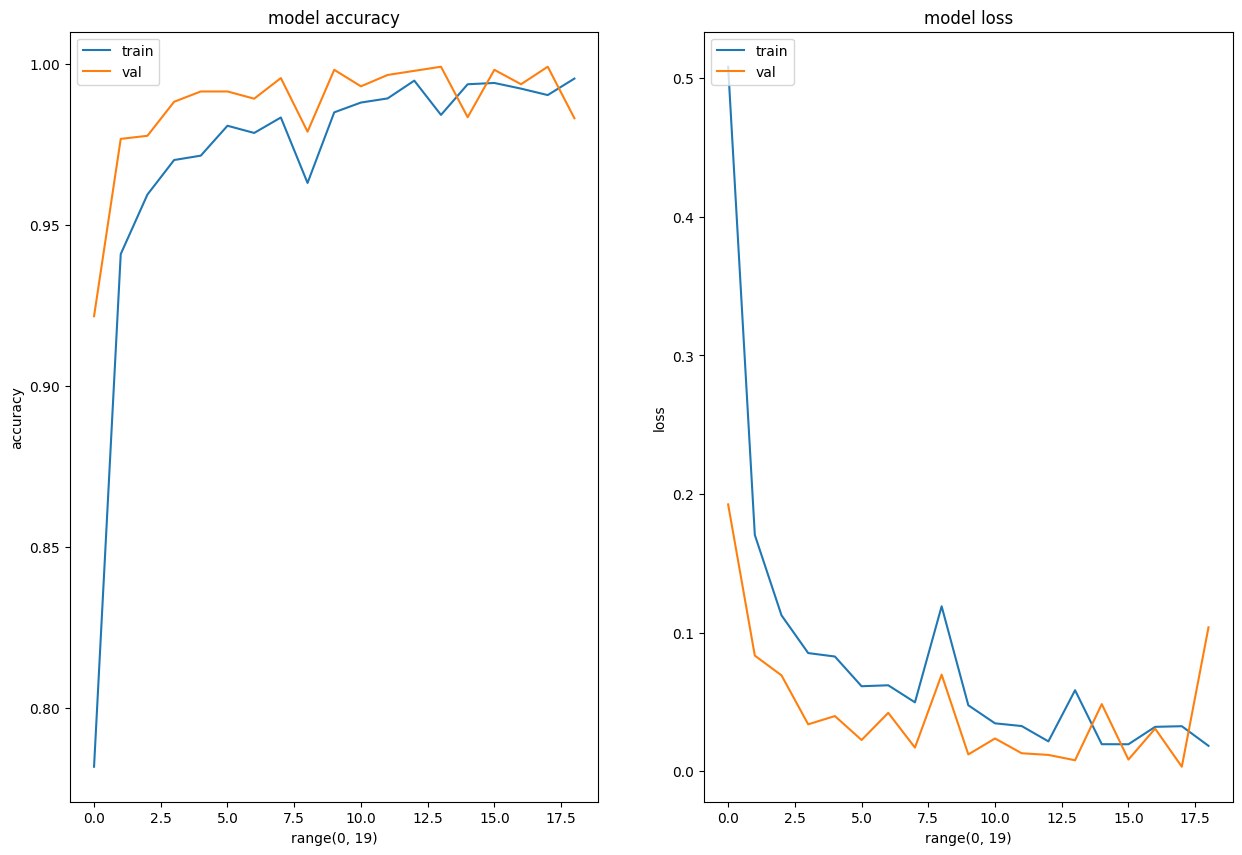

In [49]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

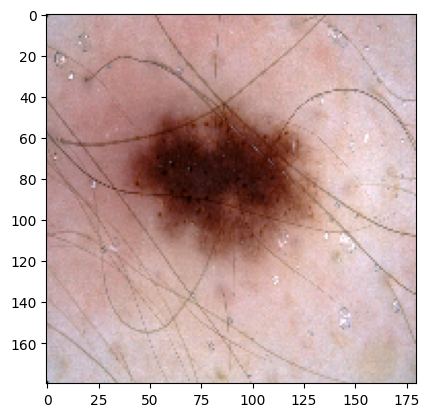

1/1 [==============================] - 0s 317ms/step
Actual Class: dermatofibroma
Predicted Class: melanoma


In [54]:
from glob import glob
from keras.preprocessing.image import load_img


# Define the path to the test directory
test_dir = '/content/gdrive/MyDrive/Colab Notebooks/Test'

# Get the list of subfolders within the test directory
subfolders = os.listdir(test_dir)

# Iterate through each subfolder
for subfolder in subfolders:
    # Construct the path to the subfolder
    subfolder_path = os.path.join(test_dir, subfolder)

    # Check if the subfolder contains any image files
    image_files = glob(os.path.join(subfolder_path, '*.jpg'))

    # If the subfolder contains at least one image file, proceed with loading and prediction
    if image_files:
        # Load the last image found in the subfolder
        test_image = load_img(image_files[-1], target_size=(180, 180, 3))
        plt.imshow(test_image)
        plt.grid(False)
        plt.show()

        # Prepare the image for prediction
        img = np.expand_dims(test_image, axis=0)

        # Make predictions
        pred = model.predict(img)
        pred_class_index = np.argmax(pred)
        pred_class = class_names[pred_class_index]

        # Print the actual and predicted classes
        print("Actual Class:", subfolder)
        print("Predicted Class:", pred_class)
        break  # Exit the loop after processing the first subfolder with images
else:
    print("No test images found in the specified directory.")
